# 06 Evaluate Alternative Models

This notebook evaluates the trained Logistic Regression and Random Forest models, calculates accuracy, and generates confusion matrices for both.

In [15]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from ds_logger import start_logging, end_logging

notebook_description = "Evaluates and compares the trained models (Logistic Regression, Random Forest) and saves performance metrics."
start_logging(notebook_name='06_evaluate_alternative_models.ipynb', notebook_description=notebook_description)

In [16]:
# Find the latest model files
model_dir = '../models'
model_files = [os.path.join(model_dir, f) for f in os.listdir(model_dir) if f.endswith('.joblib')]

latest_lr_model_file = max([f for f in model_files if 'iris_log_reg' in f], key=os.path.getctime)
latest_rf_model_file = max([f for f in model_files if 'iris_random_forest' in f], key=os.path.getctime)

# Load Models
lr_model = joblib.load(latest_lr_model_file)
rf_model = joblib.load(latest_rf_model_file)

# Find the latest feature data file
processed_data_dir = '../data/processed'
latest_feature_file = max([os.path.join(processed_data_dir, f) for f in os.listdir(processed_data_dir) if f.startswith('iris_features') and f.endswith('.csv')], key=os.path.getctime)
df = pd.read_csv(latest_feature_file)

# Prepare data for evaluation
X = df.drop('target', axis=1)
y = df['target']
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Evaluate Logistic Regression
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

# Evaluate Random Forest
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

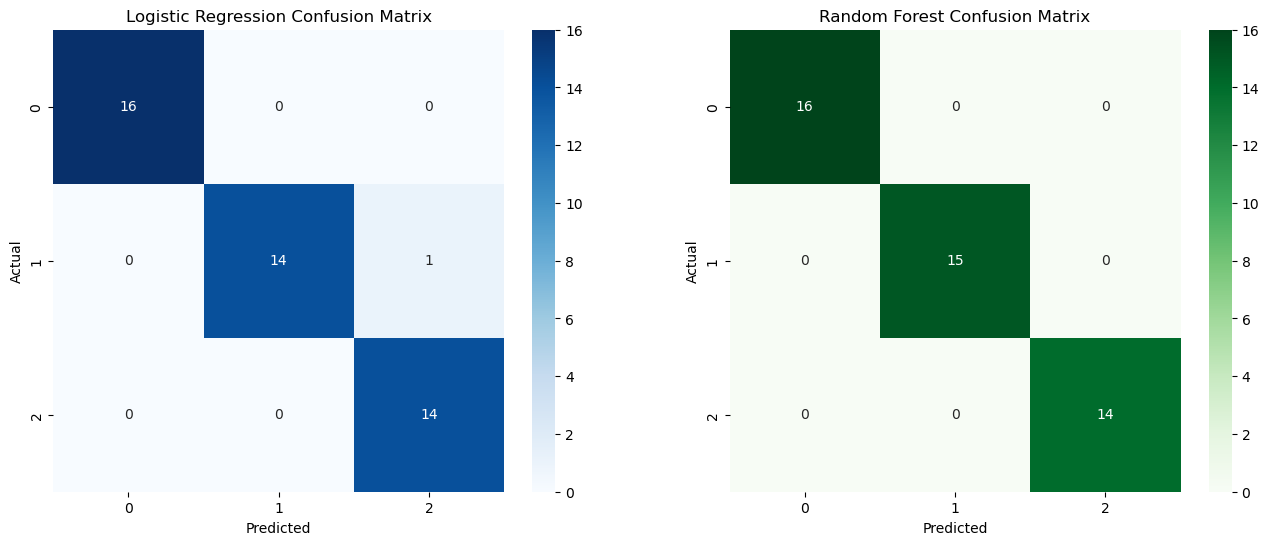

In [18]:
# Generate and save confusion matrix plots
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.savefig('../reports/confusion_matrices.png')

In [19]:
results = {
    'logistic_regression_accuracy': lr_accuracy,
    'random_forest_accuracy': rf_accuracy
}
end_logging(results=results)